# FIRST,A BRIEF RECAP OF DEEP LEARNING USING THE MNIST DATASET

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


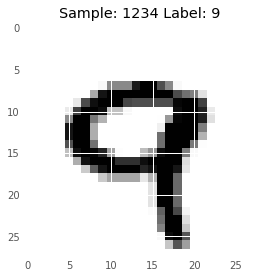

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

def display_sample(num):
    #print the one_hot arrayof this sample's label
    print(mnist.train.labels[num])
    #Print the label converted back to a number
    label = mnist.train.labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28*28 image
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

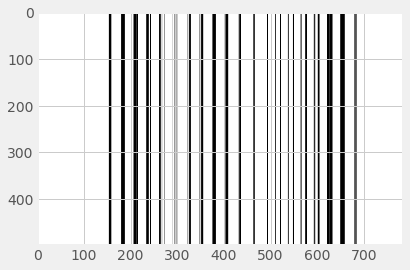

In [16]:
import numpy as np
style.use('fivethirtyeight')

images = mnist.train.images[0].reshape([1,784])
for i in range(1,500):
    images = np.concatenate((images,mnist.train.images[1].reshape([1,784])))
    
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [22]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32,shape=[None, 10])

hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer,hidden_weights) + hidden_biases

loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(digit_weights,1),tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [24]:
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) % 100 == 0):
        print(f'Training epoch {str(x+1)}')
        print(f'Acurracy: {str(accuracy.eval(feed_dict={input_images: mnist.test.images,target_labels: mnist.test.labels}))} ')

Training epoch 100
Acurracy: 0.8569 
Training epoch 200
Acurracy: 0.8816 
Training epoch 300
Acurracy: 0.8972 
Training epoch 400
Acurracy: 0.8966 
Training epoch 500
Acurracy: 0.9027 
Training epoch 600
Acurracy: 0.9088 
Training epoch 700
Acurracy: 0.91 
Training epoch 800
Acurracy: 0.9149 
Training epoch 900
Acurracy: 0.9189 
Training epoch 1000
Acurracy: 0.9202 
Training epoch 1100
Acurracy: 0.9172 
Training epoch 1200
Acurracy: 0.9212 
Training epoch 1300
Acurracy: 0.9206 
Training epoch 1400
Acurracy: 0.9258 
Training epoch 1500
Acurracy: 0.9273 
Training epoch 1600
Acurracy: 0.9273 
Training epoch 1700
Acurracy: 0.9297 
Training epoch 1800
Acurracy: 0.9259 
Training epoch 1900
Acurracy: 0.9292 
Training epoch 2000
Acurracy: 0.9306 


# TRADING  USING DEEP REINFORCEMENT LEARNING